In [93]:
#importing all libraries
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier
import joblib
import warnings
import pickle
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
#importing data set
warnings.filterwarnings('ignore')
data = pd.read_csv("ha.csv")
df = pd.DataFrame(data)
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
#dropping the columns with missing value
df.dropna()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
#Renaming the columns names
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [5]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
#removal of outliers
'''q1 = data.resting_blood_pressure.quantile(0.25)
q2 = data.resting_blood_pressure.quantile(0.75)
print(q1,q2)
IQR1 = q2-q1
print(IQR1)
lower_limit = q1-1.5*IQR1
upper_limit = q2+1.5*IQR1
print(lower_limit,upper_limit)

q3 = data.cholesterol.quantile(0.25)
q4 = data.cholesterol.quantile(0.75)
print(q3,q4)
IQR2 = q4-q3
print(IQR2)
lower_limit1 = q3-1.5*IQR2
upper_limit1= q4+1.5*IQR2
print(lower_limit1,upper_limit1)

q5 = data.max_heart_rate_achieved.quantile(0.25)
q6 = data.max_heart_rate_achieved.quantile(0.75)
print(q5,q6)
IQR3 = q6-q5
print(IQR3)
lower_limit2 = q5-1.5*IQR3
upper_limit2 = q6+1.5*IQR3
print(lower_limit2,upper_limit2)

df_no_outlier =data[(data.resting_blood_pressure>lower_limit)&(data.resting_blood_pressure<upper_limit)&(data.cholesterol>lower_limit1)&(data.cholesterol<upper_limit1)&(data.max_heart_rate_achieved>lower_limit2)&(data.max_heart_rate_achieved<upper_limit2)]
df_no_outlier'''

'q1 = data.resting_blood_pressure.quantile(0.25)\nq2 = data.resting_blood_pressure.quantile(0.75)\nprint(q1,q2)\nIQR1 = q2-q1\nprint(IQR1)\nlower_limit = q1-1.5*IQR1\nupper_limit = q2+1.5*IQR1\nprint(lower_limit,upper_limit)\n\nq3 = data.cholesterol.quantile(0.25)\nq4 = data.cholesterol.quantile(0.75)\nprint(q3,q4)\nIQR2 = q4-q3\nprint(IQR2)\nlower_limit1 = q3-1.5*IQR2\nupper_limit1= q4+1.5*IQR2\nprint(lower_limit1,upper_limit1)\n\nq5 = data.max_heart_rate_achieved.quantile(0.25)\nq6 = data.max_heart_rate_achieved.quantile(0.75)\nprint(q5,q6)\nIQR3 = q6-q5\nprint(IQR3)\nlower_limit2 = q5-1.5*IQR3\nupper_limit2 = q6+1.5*IQR3\nprint(lower_limit2,upper_limit2)\n\ndf_no_outlier =data[(data.resting_blood_pressure>lower_limit)&(data.resting_blood_pressure<upper_limit)&(data.cholesterol>lower_limit1)&(data.cholesterol<upper_limit1)&(data.max_heart_rate_achieved>lower_limit2)&(data.max_heart_rate_achieved<upper_limit2)]\ndf_no_outlier'

In [7]:
X = df.drop('target',axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)


Feature: 0, Score: 0.00226
Feature: 1, Score: 0.19166
Feature: 2, Score: 0.12000
Feature: 3, Score: 0.00086
Feature: 4, Score: -0.00039
Feature: 5, Score: 0.11522
Feature: 6, Score: 0.01717
Feature: 7, Score: -0.00190
Feature: 8, Score: 0.17465
Feature: 9, Score: 0.05334
Feature: 10, Score: 0.18266


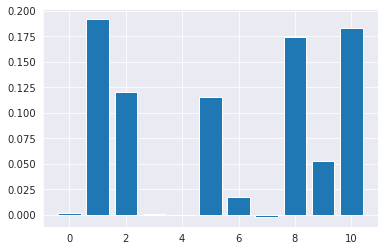

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fit the model
model.fit(X, y)
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: -0.00650
Feature: 1, Score: 1.16684
Feature: 2, Score: 0.57869
Feature: 3, Score: -0.00421
Feature: 4, Score: -0.00258
Feature: 5, Score: 0.87791
Feature: 6, Score: 0.13378
Feature: 7, Score: -0.02413
Feature: 8, Score: 1.08191
Feature: 9, Score: 0.43653
Feature: 10, Score: 0.93473


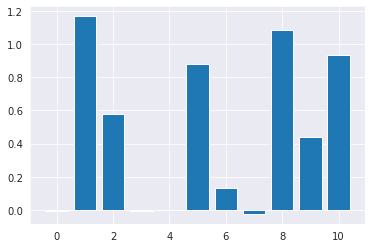

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.07366
Feature: 1, Score: 0.05576
Feature: 2, Score: 0.13799
Feature: 3, Score: 0.07102
Feature: 4, Score: 0.07023
Feature: 5, Score: 0.01812
Feature: 6, Score: 0.01928
Feature: 7, Score: 0.11194
Feature: 8, Score: 0.00281
Feature: 9, Score: 0.10325
Feature: 10, Score: 0.33594


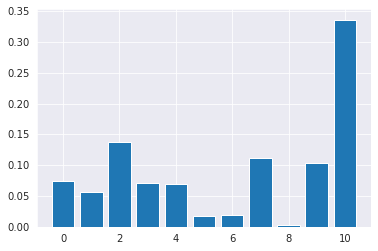

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.08714
Feature: 1, Score: 0.04193
Feature: 2, Score: 0.13752
Feature: 3, Score: 0.08368
Feature: 4, Score: 0.11123
Feature: 5, Score: 0.01857
Feature: 6, Score: 0.02620
Feature: 7, Score: 0.11960
Feature: 8, Score: 0.07935
Feature: 9, Score: 0.11524
Feature: 10, Score: 0.17952


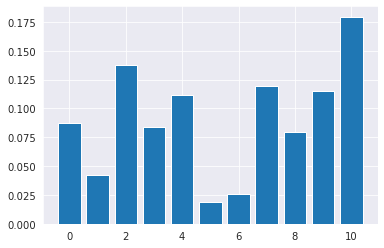

In [21]:

model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[0.07855897 0.06289197 0.13216911 0.07637482 0.09280801 0.03556543
 0.04046172 0.10535436 0.13260428 0.0930476  0.15016374]


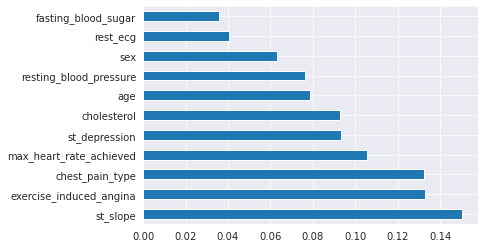

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

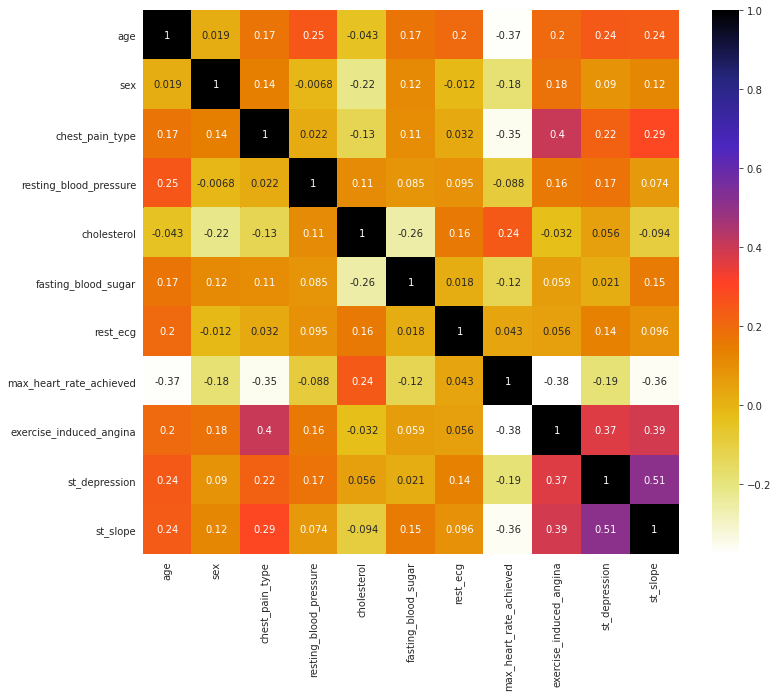

In [23]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

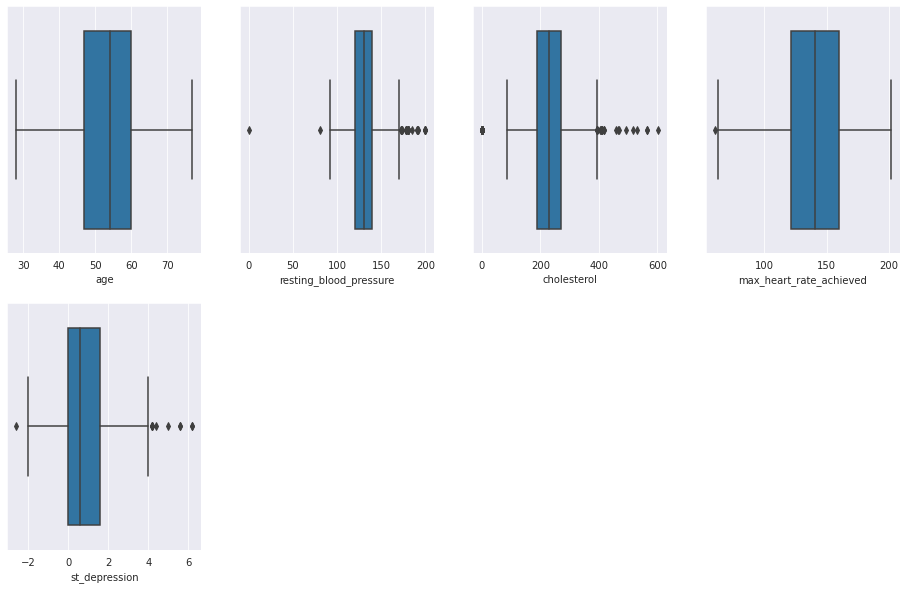

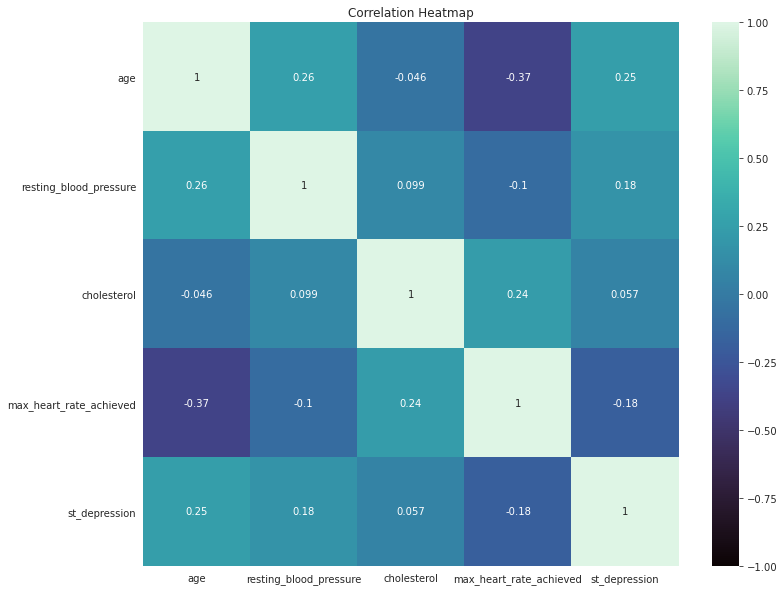

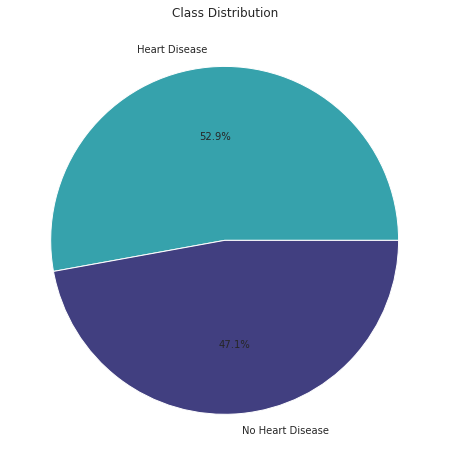

        age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0 -1.076923  0.0                     0.5     0.733945                  0.0   
1 -0.384615 -1.0                     1.5    -0.599388                  0.0   
2 -1.307692  0.0                     0.0     0.660550                  0.0   
3 -0.461538 -1.0                     0.4    -0.183486                  0.0   
4  0.000000  0.0                     1.0    -0.415902                  0.0   

   rest_ecg  max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0       0.0                 0.807692                      0.0        -0.3750   
1       0.0                 0.397436                      0.0         0.2500   
2       0.5                -1.089744                      0.0        -0.3750   
3       0.0                -0.833333                      1.0         0.5625   
4       0.0                -0.474359                      0.0        -0.3750   

   CP_1  CP_2  CP_3  CP_4  SL_0  SL_1  SL_2  SL_3 

In [96]:
#Removal of outliers and 
numeric_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']

eda_df = data.loc[:, numeric_features].copy()
plt.figure(figsize=(16, 10))

for i in range(len(eda_df.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(data['target'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['chest_pain_type', 'st_slope']
    df = onehot_encode(df, dict(zip(nominal_features, ['CP', 'SL'])))
    
    # Split df into X and y
    y = df['target'].copy()
    X = df.drop('target', axis=1).copy()
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y
X, y = preprocess_inputs(data, RobustScaler())
print(X.head())
print(y.head())
#X = df.drop('target',axis=1)
#y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [56]:
Decission_tree_model =pickle.load(open("Decission_tree_model.sav", 'rb'))

In [99]:
grid_predictions = Decission_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.50%


In [100]:
knn_model = pickle.load(open("knn_model.sav", 'rb'))

In [101]:
grid_predictions = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.41%


In [102]:
Logistic_Regression = pickle.load(open("Logistic_Regression.sav", 'rb'))

In [103]:
from sklearn.metrics import accuracy_score
grid_predictions = Logistic_Regression.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.80%


In [104]:
svm = pickle.load(open("svm.sav", 'rb'))

In [105]:
grid_predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.97%


In [106]:
neural = pickle.load(open("neural_model.sav", 'rb'))

In [107]:
grid_predictions = neural.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.85%


In [108]:
bagging = pickle.load(open("bagging.sav", 'rb'))

In [109]:
grid_predictions = bagging.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.30%


In [110]:
boosting = pickle.load(open("boosting.sav", 'rb'))

In [111]:
grid_predictions = boosting.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.09%


In [73]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')))
    level0.append(('knn', KNeighborsClassifier(metric= 'manhattan', n_neighbors= 17, weights= 'distance')))
    level0.append(('cart', DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)))
    level0.append(('svm',SVC(C= 1000, gamma= 0.0001, kernel= 'rbf')))
    level0.append(('bayes', GaussianNB()))
    level0.append(('rfa',RandomForestClassifier(max_features='sqrt', n_estimators= 100)))
    level0.append(('neural',MLPClassifier(max_iter=1500)))    
        # define meta learner model
    level1 = LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')
        # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [74]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['neural'] = MLPClassifier()  
    models['stacking'] = get_stacking()
    return models
model=get_stacking()

In [75]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.846 (0.040)
>knn 0.870 (0.040)
>cart 0.909 (0.030)
>svm 0.871 (0.034)
>neural 0.876 (0.035)
>stacking 0.947 (0.025)


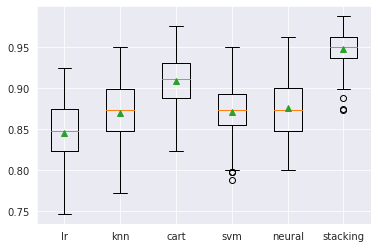

In [76]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [84]:
result = model.fit(X_train, y_train)

In [112]:
pickle.dump(model, open("stacking.sav", 'wb'))

In [113]:
stacking = pickle.load(open("stacking.sav", 'rb'))

In [114]:
grid_predictions = stacking.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.53%


In [115]:
voting = pickle.load(open("voting.sav", 'rb'))

In [116]:
grid_predictions = voting.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.09%


AttributeError: 'list' object has no attribute 'columns'